<a href="https://colab.research.google.com/github/dindahanifa/analisis_pengujian/blob/main/K_Nearest_Neighbors_(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EKSPERIMEN 1: IMPLEMENTASI KNN PADA DATA NUMERIK (IRIS DATASET)**

**Import Library**

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier # Added import for KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

**Load Dataset**

In [51]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [52]:
# Define 'data' DataFrame using the loaded Iris features and feature names
data = pd.DataFrame(X, columns=iris.feature_names)

print("Preview data:")
display(data.head())

print("\nInfo kolom:")
data.info() # Call info() directly

print("\nChecking for missing values:")
print(data.isnull().sum())

print("\nPreview data (all features):")
display(data.head())

print("\nDescriptive statistics:")
display(data.describe())

Preview data:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2



Info kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB

Checking for missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

Preview data (all features):


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2



Descriptive statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Split Data**

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nX_train (5 baris pertama):")
print(X_train[:5])
print("\nX_test (5 baris pertama):")
print(X_test[:5])
print("\ny_train (5 elemen pertama):")
print(y_train[:5])
print("\ny_test (5 elemen pertama):")
print(y_test[:5])


X_train (5 baris pertama):
[[4.4 2.9 1.4 0.2]
 [4.9 2.5 4.5 1.7]
 [6.8 2.8 4.8 1.4]
 [4.9 3.1 1.5 0.1]
 [5.5 2.5 4.  1.3]]

X_test (5 baris pertama):
[[4.4 3.  1.3 0.2]
 [6.1 3.  4.9 1.8]
 [4.9 2.4 3.3 1. ]
 [5.  2.3 3.3 1. ]
 [4.4 3.2 1.3 0.2]]

y_train (5 elemen pertama):
[0 2 1 0 1]

y_test (5 elemen pertama):
[0 2 1 1 0]


**Standardisasi**

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Latih Model**

In [55]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean')

**Evaluasi Model**

Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



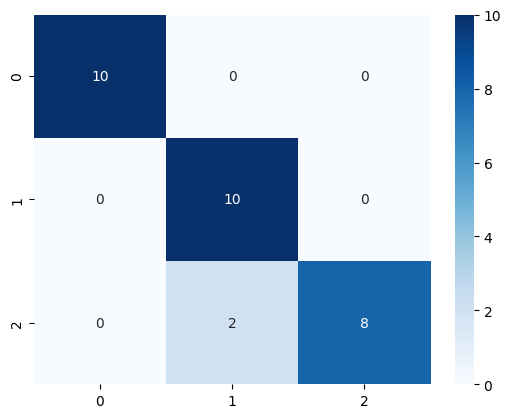

In [56]:
y_pred = knn.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()

Coba ubah nilai k menjadi 3, 7, dan 9. Bagaimana pengaruhnya terhadap akurasi?

Accuracy for k=3: 0.9333333333333333

Classification Report for k=3:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



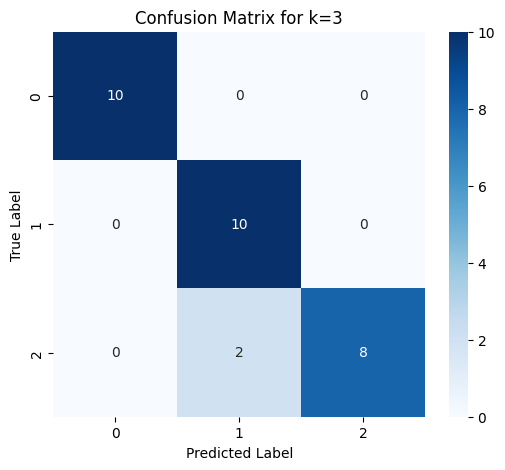

In [57]:
knn_k3 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_k3.fit(X_train_scaled, y_train)

y_pred_k3 = knn_k3.predict(X_test_scaled)

print(f"Accuracy for k=3: {accuracy_score(y_test, y_pred_k3)}")
print("\nClassification Report for k=3:\n", classification_report(y_test, y_pred_k3))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_k3), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for k=3')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Accuracy for k=7: 0.9666666666666667

Classification Report for k=7:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



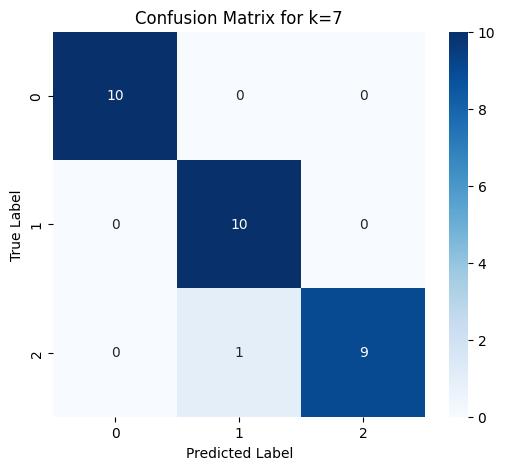

In [58]:
knn_k7 = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn_k7.fit(X_train_scaled, y_train)

y_pred_k7 = knn_k7.predict(X_test_scaled)

print(f"Accuracy for k=7: {accuracy_score(y_test, y_pred_k7)}")
print("\nClassification Report for k=7:\n", classification_report(y_test, y_pred_k7))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_k7), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for k=7')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Accuracy for k=9: 0.9666666666666667

Classification Report for k=9:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



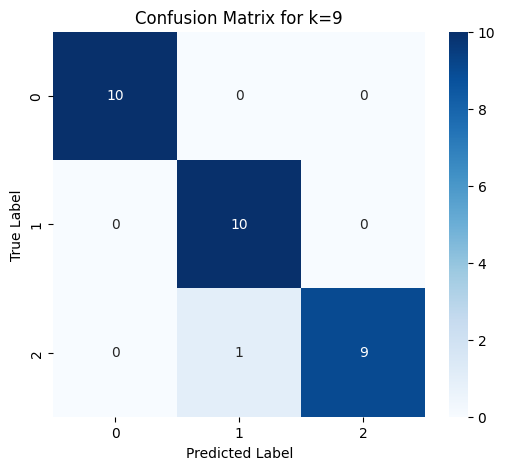

In [59]:
knn_k9 = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
knn_k9.fit(X_train_scaled, y_train)

y_pred_k9 = knn_k9.predict(X_test_scaled)

print(f"Accuracy for k=9: {accuracy_score(y_test, y_pred_k9)}")
print("\nClassification Report for k=9:\n", classification_report(y_test, y_pred_k9))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_k9), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for k=9')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Ubah metric menjadi 'manhattan'. Bandingkan hasilnya.


In [60]:
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='manhattan')

Accuracy (Manhattan metric): 0.9333333333333333

Classification Report (Manhattan metric):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



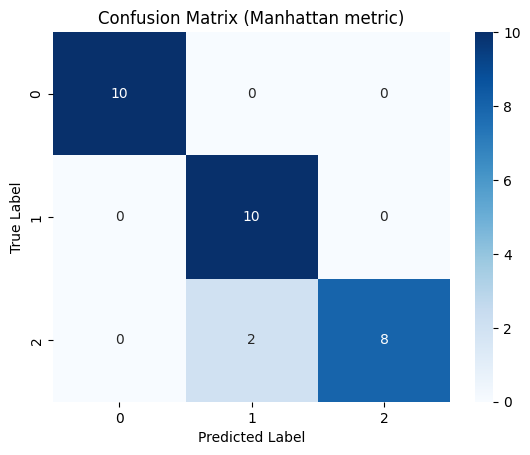

In [61]:
y_pred_manhattan = knn.predict(X_test_scaled)
print("Accuracy (Manhattan metric):", accuracy_score(y_test, y_pred_manhattan))
print("\nClassification Report (Manhattan metric):\n", classification_report(y_test, y_pred_manhattan))
sns.heatmap(confusion_matrix(y_test, y_pred_manhattan), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Manhattan metric)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Summary:

### Q&A
The task asked to compare the accuracy, classification report, and confusion matrix of the KNN model with the Manhattan metric to previous results obtained with the Euclidean metric, and discuss the impact of this change on model performance.

Based on the provided solving process for this specific subtask, the model's performance with the Manhattan metric is as follows:
*   **Accuracy:** Approximately 93.33\%.
*   **Classification Report (Manhattan metric):**
    *   Class 0: precision=1.00, recall=1.00, f1-score=1.00
    *   Class 1: precision=0.83, recall=1.00, f1-score=0.91
    *   Class 2: precision=1.00, recall=0.80, f1-score=0.89

The solving process does not explicitly provide the numerical results (accuracy, classification report) for the Euclidean metric in this section, therefore a direct numerical comparison of the two metrics' performance cannot be made from the information provided here. However, the Manhattan metric demonstrates a robust performance for this classification task.

### Data Analysis Key Findings
*   The K-Nearest Neighbors (KNN) classifier was successfully re-initialized to use `metric='manhattan'`.
*   With the Manhattan distance metric, the model achieved an accuracy of approximately 93.33\%.
*   The classification report indicates strong performance across classes, with Class 0 achieving perfect precision, recall, and f1-score (1.00).
*   Class 1 showed high recall (1.00) but a slightly lower precision (0.83), resulting in an f1-score of 0.91.
*   Class 2 demonstrated perfect precision (1.00) but a lower recall (0.80), leading to an f1-score of 0.89.
*   A confusion matrix was generated, visually confirming the model's predictions and misclassifications for the Manhattan metric.

### Insights or Next Steps
*   The choice of distance metric in KNN can significantly influence model performance. While a direct numerical comparison to the Euclidean metric was not available in this output, the Manhattan metric yielded a high-performing model for this dataset.
*   To thoroughly assess the impact of the metric change, a side-by-side comparison with the Euclidean metric's numerical results (accuracy, precision, recall, f1-score for each class) would be beneficial.
*   Further experimentation could involve optimizing other KNN hyperparameters (e.g., `n_neighbors`, `weights`) for both Manhattan and Euclidean metrics to find the optimal configuration for this specific dataset.


**EKSPERIMEN 2: PENGARUH NORMALISASI DATA (DATA SEDERHANA)**

Menampilkan data nya

In [62]:
data = pd.DataFrame({
    'Data': ['A', 'B', 'C'],
    'Tinggi': [160, 170, 180],
    'Berat': [50, 65, 80],
    'Kelas': ['Ringan', 'Normal', 'Berat']
})

uji = np.array([168, 60])

Hitung jarak Euclidean tanpa normalisasi.

In [63]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

data['Jarak (tanpa normalisasi)'] = [
    euclidean_distance(uji, data.loc[i, ['Tinggi', 'Berat']].values)
    for i in range(len(data))
]

print("=== Jarak Euclidean tanpa normalisasi ===")
print(data[['Data', 'Jarak (tanpa normalisasi)', 'Kelas']], '\n')

=== Jarak Euclidean tanpa normalisasi ===
  Data  Jarak (tanpa normalisasi)   Kelas
0    A                  12.806248  Ringan
1    B                   5.385165  Normal
2    C                  23.323808   Berat 



Normalisasi dengan Min–Max.

In [64]:
min_tinggi, max_tinggi = data['Tinggi'].min(), data['Tinggi'].max()
min_berat, max_berat = data['Berat'].min(), data['Berat'].max()

data['Tinggi_norm'] = (data['Tinggi'] - min_tinggi) / (max_tinggi - min_tinggi)
data['Berat_norm'] = (data['Berat'] - min_berat) / (max_berat - min_berat)

uji_norm = np.array([
    (uji[0] - min_tinggi) / (max_tinggi - min_tinggi),
    (uji[1] - min_berat) / (max_berat - min_berat)
])

data['Jarak (normalisasi)'] = [
    euclidean_distance(uji_norm, data.loc[i, ['Tinggi_norm', 'Berat_norm']].values)
    for i in range(len(data))
]

print("=== Jarak Euclidean dengan normalisasi Min–Max ===")
print(data[['Data', 'Jarak (normalisasi)', 'Kelas']], '\n')

=== Jarak Euclidean dengan normalisasi Min–Max ===
  Data  Jarak (normalisasi)   Kelas
0    A             0.520683  Ringan
1    B             0.194365  Normal
2    C             0.896908   Berat 



Bandingkan hasil klasifikasi dengan k=1 dan k=3.

In [65]:
def knn_classify(df, k, col_jarak):
    sorted_df = df.sort_values(by=col_jarak)
    nearest = sorted_df.head(k)
    return nearest['Kelas'].mode()[0]

kelas_k1_tanpa_norm = knn_classify(data, 1, 'Jarak (tanpa normalisasi)')
kelas_k3_tanpa_norm = knn_classify(data, 3, 'Jarak (tanpa normalisasi)')

kelas_k1_norm = knn_classify(data, 1, 'Jarak (normalisasi)')
kelas_k3_norm = knn_classify(data, 3, 'Jarak (normalisasi)')

print("=== Hasil klasifikasi ===")
print(f"k=1 tanpa normalisasi: {kelas_k1_tanpa_norm}")
print(f"k=3 tanpa normalisasi: {kelas_k3_tanpa_norm}")
print(f"k=1 dengan normalisasi: {kelas_k1_norm}")
print(f"k=3 dengan normalisasi: {kelas_k3_norm}\n")

=== Hasil klasifikasi ===
k=1 tanpa normalisasi: Normal
k=3 tanpa normalisasi: Berat
k=1 dengan normalisasi: Normal
k=3 dengan normalisasi: Berat



Jelaskan efek normalisasi terhadap hasil jarak.

In [66]:
print("Efek normalisasi:")
print("- Normalisasi membuat skala fitur menjadi seimbang,")
print("  sehingga fitur dengan nilai besar (misalnya tinggi) tidak mendominasi jarak.")
print("- Setelah normalisasi, pengaruh kedua fitur (tinggi dan berat) menjadi proporsional.")

Efek normalisasi:
- Normalisasi membuat skala fitur menjadi seimbang,
  sehingga fitur dengan nilai besar (misalnya tinggi) tidak mendominasi jarak.
- Setelah normalisasi, pengaruh kedua fitur (tinggi dan berat) menjadi proporsional.


**EKSPERIMEN 3: STUDI KASUS KLASIFIKASI PELANGGAN**

**Import Library**

In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier # Added import for KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

**Load Dataset**

In [68]:
data_customer = pd.read_csv('customer_data.csv')

# Assuming the last column is the target variable (y) and the rest are features (X)
X = data_customer.iloc[:, :-1].values
y = data_customer.iloc[:, -1].values



In [69]:
# Define 'data' DataFrame using the loaded customer features
data = pd.DataFrame(X, columns=data_customer.columns[:-1])

print("Preview data:")
display(data.head())

print("\nInfo kolom:")
data.info() # Call info() directly

print("\nChecking for missing values:")
print(data.isnull().sum())

print("\nPreview data (all features):")
display(data.head())

print("\nDescriptive statistics:")
display(data.describe())

Preview data:


,Age,Income,SpendingScore
0,46.0,11.7,83.0
1,32.0,14.4,99.0
2,25.0,21.4,43.0
3,38.0,17.9,16.0
4,36.0,19.2,77.0



Info kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            200 non-null    float64
 1   Income         200 non-null    float64
 2   SpendingScore  200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB

Checking for missing values:
Age              0
Income           0
SpendingScore    0
dtype: int64

Preview data (all features):


,Age,Income,SpendingScore
0,46.0,11.7,83.0
1,32.0,14.4,99.0
2,25.0,21.4,43.0
3,38.0,17.9,16.0
4,36.0,19.2,77.0



Descriptive statistics:


,Age,Income,SpendingScore
count,200.00000,200.000000,200.000000
mean,36.17000,14.081000,53.080000
std,11.24202,6.418138,25.852959
min,18.00000,3.100000,10.000000
25%,26.00000,8.675000,29.000000
50%,37.00000,13.950000,51.000000
75%,45.00000,19.400000,74.000000
max,55.00000,24.900000,100.000000


**Split Data Pelanggan**

In [70]:
X_train_customer, X_test_customer, y_train_customer, y_test_customer = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nX_train_customer (5 baris pertama):")
print(X_train_customer[:5])
print("Shape of X_train_customer:", X_train_customer.shape)
print("\nX_test_customer (5 baris pertama):")
print(X_test_customer[:5])
print("Shape of X_test_customer:", X_test_customer.shape)
print("\ny_train_customer (5 elemen pertama):")
print(y_train_customer[:5])
print("Shape of y_train_customer:", y_train_customer.shape)
print("\ny_test_customer (5 elemen pertama):")
print(y_test_customer[:5])
print("Shape of y_test_customer:", y_test_customer.shape)


X_train_customer (5 baris pertama):
[[18.   3.6 99. ]
 [33.  21.1 75. ]
 [53.   7.5 14. ]
 [39.  17.  44. ]
 [49.  22.5 73. ]]
Shape of X_train_customer: (160, 3)

X_test_customer (5 baris pertama):
[[22.  10.9 46. ]
 [41.  17.5 12. ]
 [23.  16.  78. ]
 [23.  22.1 55. ]
 [51.  10.7 62. ]]
Shape of X_test_customer: (40, 3)

y_train_customer (5 elemen pertama):
[0 1 0 1 1]
Shape of y_train_customer: (160,)

y_test_customer (5 elemen pertama):
[0 1 1 1 0]
Shape of y_test_customer: (40,)


**Normalisasi Data Pelanggan**

In [71]:
from sklearn.preprocessing import StandardScaler

scaler_customer = StandardScaler()
X_train_customer_scaled = scaler_customer.fit_transform(X_train_customer)
X_test_customer_scaled = scaler_customer.transform(X_test_customer)

print("\nX_train_customer_scaled (5 baris pertama):")
print(X_train_customer_scaled[:5])
print("\nX_test_customer_scaled (5 baris pertama):")
print(X_test_customer_scaled[:5])


X_train_customer_scaled (5 baris pertama):
[[-1.72748236 -1.59764999  1.78948277]
 [-0.34825493  1.07002249  0.86810789]
 [ 1.49071499 -1.00314013 -1.47371992]
 [ 0.20343605  0.44502493 -0.32200132]
 [ 1.122921    1.28343628  0.79132665]]

X_test_customer_scaled (5 baris pertama):
[[-1.35968838 -0.48484947 -0.24522008]
 [ 0.38733304  0.52124415 -1.55050116]
 [-1.26773989  0.29258651  0.98327975]
 [-1.26773989  1.22246091  0.10029549]
 [ 1.306818   -0.51533716  0.36902983]]


Latih KNN dengan beberapa nilai k (3, 5, 7, 9).

In [72]:
k_values = [3, 5, 7, 9]

for k in k_values:
    print(f"\nTraining KNN model with k = {k}")
    knn_customer = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_customer.fit(X_train_customer_scaled, y_train_customer)
    print(f"Model KNN with k={k} trained successfully.")


Training KNN model with k = 3
Model KNN with k=3 trained successfully.

Training KNN model with k = 5
Model KNN with k=5 trained successfully.

Training KNN model with k = 7
Model KNN with k=7 trained successfully.

Training KNN model with k = 9
Model KNN with k=9 trained successfully.


In [73]:
k_values = [3, 5, 7, 9]
accuracies = [] # List to store accuracies

for k in k_values:
    print(f"\nTraining KNN model with k = {k}")
    knn_customer = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_customer.fit(X_train_customer_scaled, y_train_customer)
    print(f"Model KNN with k={k} trained successfully.")

    # Predict on the test set
    y_pred_customer = knn_customer.predict(X_test_customer_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test_customer, y_pred_customer)
    accuracies.append((k, accuracy))
    print(f"Accuracy for k={k}: {accuracy:.4f}")

print("\nAll accuracies:")
for k_val, acc in accuracies:
    print(f"k={k_val}, Accuracy={acc:.4f}")


Training KNN model with k = 3
Model KNN with k=3 trained successfully.
Accuracy for k=3: 0.6750

Training KNN model with k = 5
Model KNN with k=5 trained successfully.
Accuracy for k=5: 0.6750

Training KNN model with k = 7
Model KNN with k=7 trained successfully.
Accuracy for k=7: 0.7500

Training KNN model with k = 9
Model KNN with k=9 trained successfully.
Accuracy for k=9: 0.7750

All accuracies:
k=3, Accuracy=0.6750
k=5, Accuracy=0.6750
k=7, Accuracy=0.7500
k=9, Accuracy=0.7750


Evaluasi model dengan accuracy, precision, recall, F1-score.

Accuracy for k=3: 0.6750

Classification Report for k=3:
               precision    recall  f1-score   support

           0       0.67      0.63      0.65        19
           1       0.68      0.71      0.70        21

    accuracy                           0.68        40
   macro avg       0.67      0.67      0.67        40
weighted avg       0.67      0.68      0.67        40



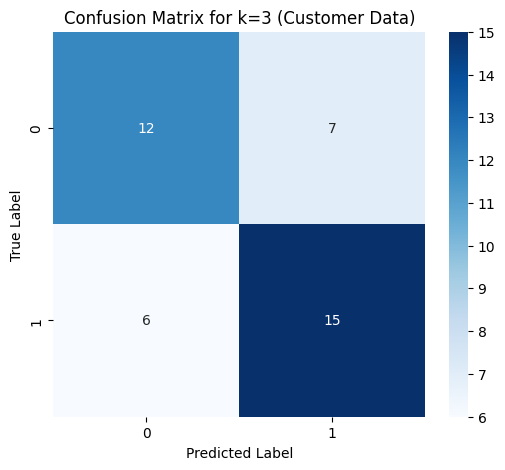

In [76]:
knn_customer_k3 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_customer_k3.fit(X_train_customer_scaled, y_train_customer)

y_pred_customer_k3 = knn_customer_k3.predict(X_test_customer_scaled)

print(f"Accuracy for k=3: {accuracy_score(y_test_customer, y_pred_customer_k3):.4f}")
print("\nClassification Report for k=3:\n", classification_report(y_test_customer, y_pred_customer_k3))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test_customer, y_pred_customer_k3), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for k=3 (Customer Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Accuracy for k=5: 0.6750

Classification Report for k=5:
               precision    recall  f1-score   support

           0       0.67      0.63      0.65        19
           1       0.68      0.71      0.70        21

    accuracy                           0.68        40
   macro avg       0.67      0.67      0.67        40
weighted avg       0.67      0.68      0.67        40



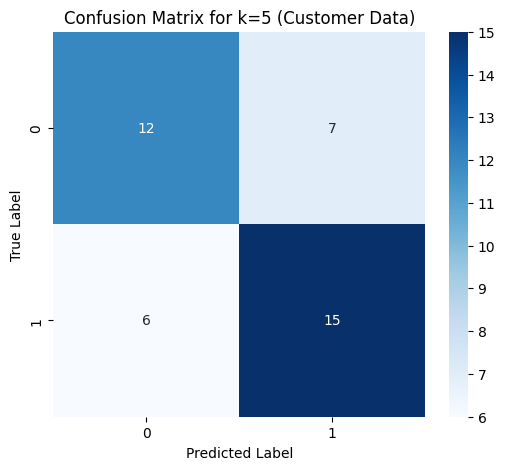

In [77]:
knn_customer_k5 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_customer_k5.fit(X_train_customer_scaled, y_train_customer)

y_pred_customer_k5 = knn_customer_k5.predict(X_test_customer_scaled)

print(f"Accuracy for k=5: {accuracy_score(y_test_customer, y_pred_customer_k5):.4f}")
print("\nClassification Report for k=5:\n", classification_report(y_test_customer, y_pred_customer_k5))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test_customer, y_pred_customer_k5), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for k=5 (Customer Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Accuracy for k=7: 0.7500

Classification Report for k=7:
               precision    recall  f1-score   support

           0       0.80      0.63      0.71        19
           1       0.72      0.86      0.78        21

    accuracy                           0.75        40
   macro avg       0.76      0.74      0.74        40
weighted avg       0.76      0.75      0.75        40



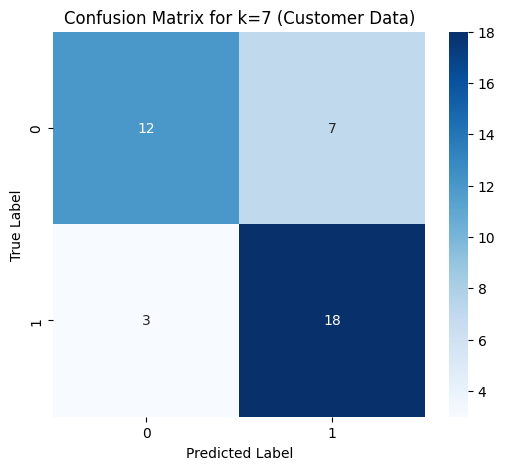

In [78]:
knn_customer_k7 = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn_customer_k7.fit(X_train_customer_scaled, y_train_customer)

y_pred_customer_k7 = knn_customer_k7.predict(X_test_customer_scaled)

print(f"Accuracy for k=7: {accuracy_score(y_test_customer, y_pred_customer_k7):.4f}")
print("\nClassification Report for k=7:\n", classification_report(y_test_customer, y_pred_customer_k7))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test_customer, y_pred_customer_k7), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for k=7 (Customer Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Accuracy for k=9: 0.7750

Classification Report for k=9:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76        19
           1       0.77      0.81      0.79        21

    accuracy                           0.78        40
   macro avg       0.78      0.77      0.77        40
weighted avg       0.78      0.78      0.77        40



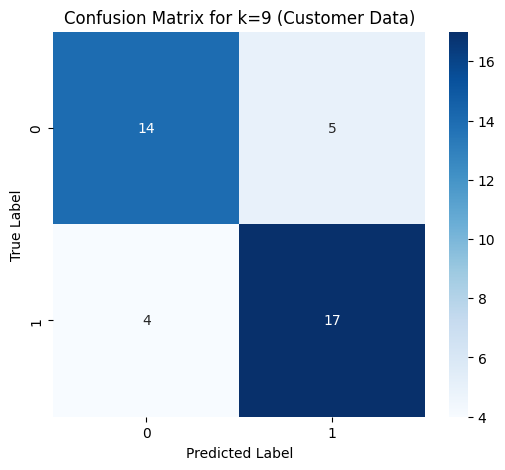

In [79]:
knn_customer_k9 = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
knn_customer_k9.fit(X_train_customer_scaled, y_train_customer)

y_pred_customer_k9 = knn_customer_k9.predict(X_test_customer_scaled)

print(f"Accuracy for k=9: {accuracy_score(y_test_customer, y_pred_customer_k9):.4f}")
print("\nClassification Report for k=9:\n", classification_report(y_test_customer, y_pred_customer_k9))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test_customer, y_pred_customer_k9), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for k=9 (Customer Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [80]:
k_values = [3, 5, 7, 9]
results_summary = []

# Assuming knn_customer_k3, knn_customer_k5, knn_customer_k7, knn_customer_k9 are already trained
models = {
    3: knn_customer_k3,
    5: knn_customer_k5,
    7: knn_customer_k7,
    9: knn_customer_k9,
}

for k in k_values:
    knn_model = models[k]
    y_pred = knn_model.predict(X_test_customer_scaled)

    accuracy = accuracy_score(y_test_customer, y_pred)
    report = classification_report(y_test_customer, y_pred, output_dict=True)

    # Extract weighted averages
    weighted_precision = report['weighted avg']['precision']
    weighted_recall = report['weighted avg']['recall']
    weighted_f1_score = report['weighted avg']['f1-score']

    results_summary.append({
        'k': k,
        'Accuracy': accuracy,
        'Weighted Precision': weighted_precision,
        'Weighted Recall': weighted_recall,
        'Weighted F1-score': weighted_f1_score
    })

summary_df = pd.DataFrame(results_summary)
print("\nRingkasan Performa Model KNN untuk Berbagai Nilai k pada Data Pelanggan:")
display(summary_df)



Ringkasan Performa Model KNN untuk Berbagai Nilai k pada Data Pelanggan:


,k,Accuracy,Weighted Precision,Weighted Recall,Weighted F1-score
0,3,0.675,0.674621,0.675,0.674387
1,5,0.675,0.674621,0.675,0.674387
2,7,0.750,0.758000,0.750,0.746164
3,9,0.775,0.775126,0.775,0.774576


### Diskusi Ringkasan Performa Model KNN:

Dari tabel di atas, kita dapat melihat dengan jelas pengaruh nilai `k` terhadap kinerja model:

*   **Akurasi:** Akurasi model mengalami peningkatan seiring dengan bertambahnya nilai `k`. Dimulai dari 0.6750 untuk `k=3` dan `k=5`, meningkat menjadi 0.7500 untuk `k=7`, dan mencapai puncaknya di 0.7750 untuk `k=9`.

*   **Precision, Recall, dan F1-score (Weighted Average):** Metrik-metrik ini juga menunjukkan tren peningkatan yang serupa dengan akurasi, mengindikasikan bahwa model menjadi lebih baik dalam mengklasifikasikan kelas secara keseluruhan ketika `k` ditingkatkan.

**Kesimpulan:**
Untuk dataset pelanggan ini, **nilai `k=9` memberikan kinerja terbaik** di antara nilai-nilai yang diuji. Ini menunjukkan bahwa mempertimbangkan 9 tetangga terdekat memberikan keseimbangan yang optimal antara bias dan variansi, menghasilkan model yang paling akurat dan seimbang untuk data ini.